In [1]:
##import csv
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

ruta = "../../data/processed_data/fonasa.csv"

df_pais = pd.read_csv(ruta)
df_pais.head()

,REGIÓN,COMUNA,BENEFICIARIOS_CHILENOS,BENEFICIARIOS_EXTRANJEROS,TOTAL_BENEFICIARIOS,PORCENTAJE_EXTRANJEROS
0,De Antofagasta,Antofagasta,263334,86784,350118,24.79
1,De Antofagasta,Calama,112470,41553,154023,26.98
2,De Antofagasta,María Elena,1915,739,2654,27.84
3,De Antofagasta,Mejillones,4917,4179,9096,45.94
4,De Antofagasta,Ollagüe,32,33,65,50.77


In [5]:
df_select =  df_pais[["REGIÓN","COMUNA","BENEFICIARIOS_CHILENOS","BENEFICIARIOS_EXTRANJEROS"]]
df_grouped = (
    df_select
    .groupby(["REGIÓN"], as_index=False)
    .agg({
        "BENEFICIARIOS_CHILENOS": "sum",
        "BENEFICIARIOS_EXTRANJEROS": "sum"
    })
)
df_grouped.head()

,REGIÓN,BENEFICIARIOS_CHILENOS,BENEFICIARIOS_EXTRANJEROS
0,De Antofagasta,412628,141120
1,De Arica Y Parinacota,194369,47675
2,De Atacama,259522,30515
3,De Aysén Del Gral. C. Ibáñez Del Campo,79893,3960
4,De Coquimbo,725247,45713


In [6]:
df_grouped["REGIÓN"].unique()

array(['De Antofagasta', 'De Arica Y Parinacota', 'De Atacama',
       'De Aysén Del Gral. C. Ibáñez Del Campo', 'De Coquimbo',
       'De La Araucanía', 'De Los Lagos', 'De Los Ríos',
       'De Magallanes Y De La Antártica Chilena', 'De Tarapacá',
       'De Valparaíso', 'De Ñuble', 'Del Bíobío',
       "Del Libertador General Bernardo O'Higgins", 'Del Maule',
       'Metropolitana De Santiago'], dtype=object)

In [7]:
df_grouped["REGIÓN"] = (
    df_grouped["REGIÓN"]
    .str.replace(r"^De\s+", "", regex=True)   # elimina "De " al inicio
    .str.replace(r"^Del\s+", "", regex=True)  # elimina "Del " al inicio
)

In [8]:
df_grouped["REGIÓN"].unique()

array(['Antofagasta', 'Arica Y Parinacota', 'Atacama',
       'Aysén Del Gral. C. Ibáñez Del Campo', 'Coquimbo', 'La Araucanía',
       'Los Lagos', 'Los Ríos', 'Magallanes Y De La Antártica Chilena',
       'Tarapacá', 'Valparaíso', 'Ñuble', 'Bíobío',
       "Libertador General Bernardo O'Higgins", 'Maule',
       'Metropolitana De Santiago'], dtype=object)

In [12]:
df_porcentaje = df_grouped.copy()
df_porcentaje["PORCENTAJE_EXTRANJEROS"] = (
    df_porcentaje["BENEFICIARIOS_EXTRANJEROS"] /
    (df_porcentaje["BENEFICIARIOS_CHILENOS"] + df_porcentaje["BENEFICIARIOS_EXTRANJEROS"])
) * 100
# Redondear a 2 decimales
df_porcentaje["PORCENTAJE_EXTRANJEROS"] = df_porcentaje["PORCENTAJE_EXTRANJEROS"].round(2)
df_porcentaje = df_porcentaje[["REGIÓN", "PORCENTAJE_EXTRANJEROS"]]

In [25]:
df_porcentaje.head(20)

,REGIÓN,PORCENTAJE_EXTRANJEROS
0,Antofagasta,25.48
1,Arica Y Parinacota,19.70
2,Atacama,10.52
3,Aysén Del Gral. C. Ibáñez Del Campo,4.72
4,Coquimbo,5.93
5,La Araucanía,2.15
6,Los Lagos,4.44
7,Los Ríos,1.98
8,Magallanes Y De La Antártica Chilena,8.66
9,Tarapacá,26.73


In [34]:
# Cargar el shapefile (geometría de las regiones)
gdf = gpd.read_file("regiones.json")

In [35]:
gdf["name"].unique()

array(['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Región Metropolitana de Santiago', 'Valparaíso',
       'Maule', "Libertador General Bernardo O'Higgins", 'Ñuble',
       'La Araucanía', 'Bío-Bío', 'Los Ríos', 'Los Lagos',
       'Aisén del General Carlos Ibáñez del Campo',
       'Magallanes y Antártica Chilena'], dtype=object)

In [36]:
gdf["name"] = gdf["name"].replace({
    "Región Metropolitana de Santiago": "Metropolitana De Santiago",
    "Bío-Bío": "Bíobío",
    "Aisén del General Carlos Ibáñez del Campo": "Aysén Del Gral. C. Ibáñez Del Campo",
    "Magallanes y Antártica Chilena": "Magallanes Y De La Antártica Chilena",
    "Arica y Parinacota": "Arica Y Parinacota"
})

In [37]:
gdf_reg = gdf.merge(df_porcentaje, left_on="name", right_on="REGIÓN")

In [38]:
gdf_reg.head(20)

,source,id,name,geometry,REGIÓN,PORCENTAJE_EXTRANJEROS
0,https://simplemaps.com,CLAP,Arica Y Parinacota,"POLYGON ((-68.98961 -18.94649, -68.99043 -18.9...",Arica Y Parinacota,19.70
1,https://simplemaps.com,CLTA,Tarapacá,"POLYGON ((-70.27033 -19.17148, -70.26956 -19.1...",Tarapacá,26.73
2,https://simplemaps.com,CLAN,Antofagasta,"POLYGON ((-70.06135 -21.44834, -70.05853 -21.4...",Antofagasta,25.48
3,https://simplemaps.com,CLAT,Atacama,"POLYGON ((-70.63464 -26.02863, -70.63455 -26.0...",Atacama,10.52
4,https://simplemaps.com,CLCO,Coquimbo,"POLYGON ((-71.48712 -29.21134, -71.48697 -29.2...",Coquimbo,5.93
5,https://simplemaps.com,CLRM,Metropolitana De Santiago,"POLYGON ((-70.1061 -33.05259, -70.10528 -33.05...",Metropolitana De Santiago,15.85
6,https://simplemaps.com,CLVS,Valparaíso,"POLYGON ((-71.54384 -32.19303, -71.54377 -32.1...",Valparaíso,6.28
7,https://simplemaps.com,CLML,Maule,"POLYGON ((-70.37245 -35.02739, -70.36852 -35.0...",Maule,5.14
8,https://simplemaps.com,CLLI,Libertador General Bernardo O'Higgins,"POLYGON ((-71.71794 -33.97116, -71.71208 -33.9...",Libertador General Bernardo O'Higgins,7.29
9,https://simplemaps.com,CLNB,Ñuble,"POLYGON ((-72.79914 -36.0531, -72.79501 -36.05...",Ñuble,2.90


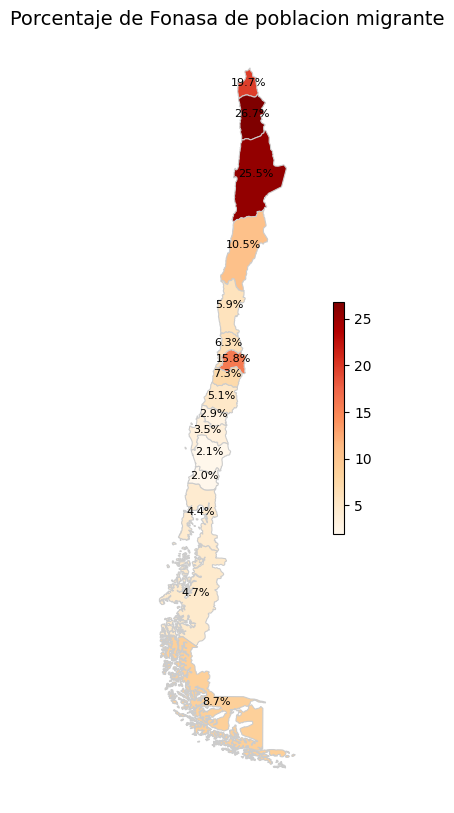

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

gdf_reg.plot(column="PORCENTAJE_EXTRANJEROS", 
         cmap="OrRd", 
         linewidth=0.8, 
         edgecolor="0.8", 
         legend=True,
         legend_kwds={"shrink": 0.3},
         ax=ax)

# Poner etiquetas con el valor en el centroide de cada región
for idx, row in gdf_reg.iterrows():
    plt.annotate(
        text=f"{round(row['PORCENTAJE_EXTRANJEROS'],1)}%",
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        ha='center',
        fontsize=8,
        color="black"
    )

ax.set_title("Porcentaje de Fonasa de poblacion migrante", fontsize=14)
ax.axis("off")
plt.show()